In [42]:
#Implementation of neural network from scratch using NumPy
#Data set
# A
a=[0,0,1,1,0,0,
  0,1,0,0,1,0,
  1,1,1,1,1,1,
  1,0,0,0,0,1,
  1,0,0,0,0,1]

#B
b=[0,1,1,1,1,0,
  0,1,0,0,1,0,
  0,1,1,1,1,0,
  0,1,0,0,1,0,
  0,1,1,1,1,0]

#C
c=[0,1,1,1,1,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,1,1,1,0]

In [67]:
Y=[[1,0,0],[0,1,0],[0,0,1]]

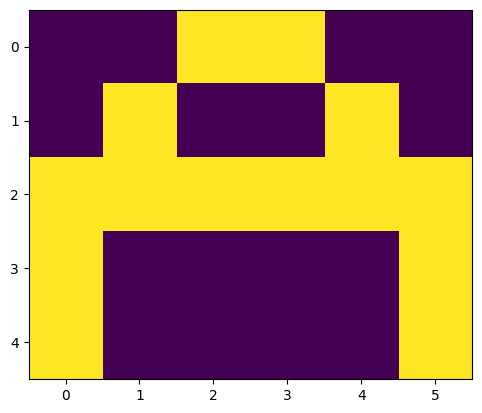

In [44]:
import numpy as np
import matplotlib.pyplot as plt
#Visualizing a
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [80]:
#converting data and labels into numpy array
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(Y)

In [81]:
#Creating layers
#input(1,30)
#hidden(1,5)
#output(3,3)

In [128]:
#Activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))
    
    

In [129]:
#Forward tracking.
def f_forward(x,w1,w2):
    #Hidden Layer
    hi = x.dot(w1)
    ho = sigmoid(hi)

    #output layer
    oi = ho.dot(w2)
    oo = sigmoid(oi)

    return oo
    

In [130]:
#generating weights:
def weights(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))
    

In [131]:
#Loss Calculation
def Loss(out,Y):
    s = (np.square(out-Y))
    s=np.sum(s)/len(Y)
    return s

    

In [132]:
#backtracking
def back(x,y,w1,w2,alpha):

    #hiddenlayer
    hi = x.dot(w1)
    ho = sigmoid(hi)


    #Output Layer
    oi = ho.dot(w2)
    oo=sigmoid(oi)

    #gradiant loss in due to output layer
    d2 = (oo-y)

    #gradient loss due to hidden layer

    d1 = np.multiply((w2.dot(d2.transpose())).transpose(),(np.multiply(ho,1-ho)))

    #gradiant adjustment
    w1_adj = x.transpose().dot(d1)
    w2_adj =  ho.transpose().dot(d2)

    w1 = w1-(alpha*w1_adj)
    w2 = w2-(alpha*w2_adj)

    return(w1,w2)
    
    

    

In [155]:
def train(x,y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    loss=[]
    for j in range (epoch):
         l = []
         for i in range(len(x)):
            out = f_forward(x[i],w1,w2)
            l.append((Loss(out,y[i])))
            w1,w2 = back(x[i],y[i],w1,w2,alpha)
         print("epochs: ",j+1,"acc: ",(1-(sum(l)/len(x)))*100)
         acc.append((1-(sum(l)/len(x)))*100)
         loss.append(sum(l)/len(x))
    return(acc,loss,w1,w2)



In [164]:
def predict(x,w1,w2):
    out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if(maxm<out[0][i]):
            maxm=out[0][i]
            k=i
    if(k==0):
        print("Image is of letter A")
    elif(k==1):
        print("Image is of letter B")
    else:
        print("Image is of Letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()
    

In [165]:
w1 = weights(30,5)
w2 = weights(5,3)

acc ,loss, w1,w2=train(x,y,w1,w2,0.1,100)


epochs:  1 acc:  71.57848160252986
epochs:  2 acc:  75.00218684459767
epochs:  3 acc:  77.39118864463839
epochs:  4 acc:  79.03817762193668
epochs:  5 acc:  80.21422670562019
epochs:  6 acc:  81.10151633247486
epochs:  7 acc:  81.81054490041234
epochs:  8 acc:  82.40534558296456
epochs:  9 acc:  82.92242353440403
epochs:  10 acc:  83.38297854431202
epochs:  11 acc:  83.80013758136266
epochs:  12 acc:  84.18286527454929
epochs:  13 acc:  84.53787493412136
epochs:  14 acc:  84.8704816732954
epochs:  15 acc:  85.18497811144636
epochs:  16 acc:  85.48483275687595
epochs:  17 acc:  85.77283614088583
epochs:  18 acc:  86.05123223973872
epochs:  19 acc:  86.32183905668357
epochs:  20 acc:  86.5861543057089
epochs:  21 acc:  86.84544331369078
epochs:  22 acc:  87.10080900085305
epochs:  23 acc:  87.35324562115889
epochs:  24 acc:  87.60367850026498
epochs:  25 acc:  87.85299159843389
epochs:  26 acc:  88.10204369899196
epochs:  27 acc:  88.35167263963717
epochs:  28 acc:  88.60268549283005
epo

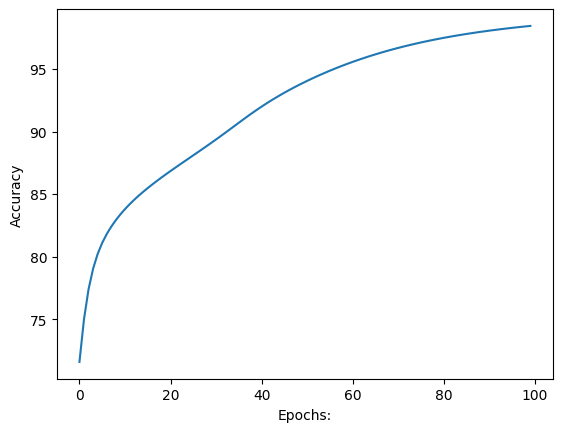

In [166]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs:')
plt1.show()


Image is of letter B


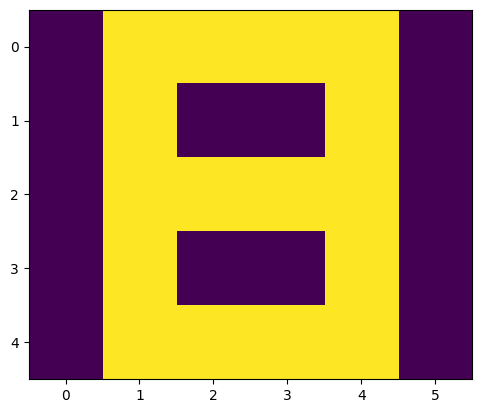

In [173]:
#make predictions
predict(x[1],w1,w2)